In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import math

In [2]:
df_raw = pd.read_csv('../data/raw/raw.csv', index_col=0)
df_raw

,Country,Health.expenditures....of.GDP.,Literacy....,Physicians.density..physicians.1.000.population.,Obesity - adult prevalence rate (%),Life expectancy at birth (years),H_bed_density,Imigrate_Rate,Pop_Density,Death Rate,Recovery Rate,GDP - per capita (PPP) (US$),Unemployment rate (%)
0,Afghanistan,10.2,38.2,0.28,5.5,52.1,0.5,-0.6,54.0,0.032213,0.056022,2000.0,23.9
1,Albania,6.7,97.6,1.20,21.7,78.6,2.9,-3.3,106.0,0.050526,0.522105,12500.0,13.8
2,Algeria,6.6,80.2,1.83,27.4,77.2,1.9,-0.9,17.0,0.157488,0.333816,15200.0,11.7
3,Andorra,10.4,100.0,3.33,25.6,82.9,2.5,0.0,183.0,0.047041,0.194234,49900.0,3.7
4,Angola,2.9,71.1,0.21,8.2,60.6,NaN,0.1,24.0,0.105263,0.263158,6800.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.0,0.0
195,Venezuela,3.2,97.1,NaN,25.6,76.2,0.8,-1.2,35.0,0.046632,0.575130,12500.0,27.1
196,Vietnam,5.7,94.5,0.82,2.1,73.9,2.6,-0.3,293.0,0.000000,0.632959,6900.0,2.2
197,Zambia,5.4,63.4,0.09,8.1,53.0,2.0,0.0,22.0,0.044444,0.666667,4000.0,15.0


In [3]:
df_preprocessed = pd.read_csv('../data/preprocessed/preprocessed.csv', index_col=0)
df_preprocessed


,Country,Health.expenditures....of.GDP.,Literacy....,Physicians.density..physicians.1.000.population.,Obesity - adult prevalence rate (%),Life expectancy at birth (years),H_bed_density,Imigrate_Rate,Pop_Density,Death Rate,Recovery Rate,GDP - per capita (PPP) (US$),Unemployment rate (%)
0,Afghanistan,10.200000,6.180615,0.280000,5.500000,52.100000,0.405465,-0.600000,4.007333,0.031705,0.056022,7.601402,3.214868
1,Albania,6.700000,9.879271,1.200000,21.700000,78.600000,1.360977,-3.300000,4.672829,0.049291,0.522105,9.433564,2.694627
2,Algeria,6.600000,8.955445,1.830000,27.400000,77.200000,1.064711,-0.900000,2.890372,0.146252,0.333816,9.629116,2.541602
3,Andorra,10.400000,10.000000,3.330000,25.600000,82.900000,1.252763,0.000000,5.214936,0.045968,0.194234,10.817796,1.547563
4,Angola,2.900000,8.432082,0.210000,8.200000,60.600000,1.450569,0.100000,3.218876,0.100083,0.263158,8.824825,2.028148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Vatican City,6.536709,9.223027,1.910361,18.593333,73.690055,1.450569,0.315294,5.915584,0.000000,0.250000,0.000000,0.000000
195,Venezuela,3.200000,9.853933,1.910361,25.600000,76.200000,0.587787,-1.200000,3.583519,0.045578,0.575130,9.433564,3.335770
196,Vietnam,5.700000,9.721111,0.820000,2.100000,73.900000,1.280934,-0.300000,5.683580,0.000000,0.632959,8.839422,1.163151
197,Zambia,5.400000,7.962412,0.090000,8.100000,53.000000,1.098612,0.000000,3.135494,0.043485,0.666667,8.294300,2.772589


In [4]:
df_raw.columns = ['country', 'health_expend', 'literacy', 'physicians_density', 'obesity', 'life_expect', 'h_bed_density',
              'imigrate_rate','pop_density','death_rate','recovery_rate', 'GDP', 'unemp_rate']
df_preprocessed.columns = ['country', 'health_expend', 'literacy', 'physicians_density', 'obesity', 'life_expect', 'h_bed_density',
              'imigrate_rate','pop_density','death_rate','recovery_rate', 'GDP', 'unemp_rate']


# 1. Overview

In [5]:
df_raw.describe()

,health_expend,literacy,physicians_density,obesity,life_expect,h_bed_density,imigrate_rate,pop_density,death_rate,recovery_rate,GDP,unemp_rate
count,158.000000,137.000000,166.000000,165.000000,181.000000,148.000000,170.000000,170.000000,199.000000,199.000000,199.000000,199.000000
mean,6.536709,85.064234,1.910361,18.593333,73.690055,3.265541,0.315294,369.770588,0.037365,0.244887,22570.854271,8.689950
std,2.480404,18.531153,1.562519,8.990870,7.608549,2.598789,6.931363,1463.230369,0.041919,0.225250,24999.978884,10.239589
min,2.000000,19.100000,0.020000,2.100000,52.100000,0.100000,-40.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000,77.900000,0.507500,8.900000,69.600000,1.375000,-1.675000,31.500000,0.004887,0.085604,4000.000000,2.900000
50%,6.200000,94.400000,1.780000,20.600000,75.400000,2.700000,-0.200000,90.500000,0.022578,0.165580,13600.000000,5.800000
75%,7.900000,98.400000,2.897500,25.000000,78.900000,4.525000,1.700000,207.750000,0.053099,0.355731,32750.000000,10.200000
max,15.200000,100.000000,8.190000,37.900000,89.400000,13.800000,57.000000,15364.000000,0.222222,1.000000,139100.000000,77.000000


In [6]:
df_preprocessed.describe()

,health_expend,literacy,physicians_density,obesity,life_expect,h_bed_density,imigrate_rate,pop_density,death_rate,recovery_rate,GDP,unemp_rate
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,6.536709,9.173903,1.910361,18.593333,73.690055,1.328538,0.315294,4.646077,0.035902,0.244887,8.630861,1.825128
std,2.208714,0.953052,1.426378,8.182595,7.254466,0.498699,6.403676,1.502406,0.039267,0.225250,3.087966,0.995707
min,2.000000,4.370355,0.020000,2.100000,52.100000,0.095310,-40.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.200000,9.223027,0.805000,11.150000,71.250000,0.955511,-1.100000,3.784190,0.004875,0.085604,8.294300,1.360977
50%,6.536709,9.223027,1.910361,18.900000,74.900000,1.450569,0.000000,4.653960,0.022327,0.165580,9.517899,1.916923
75%,7.400000,9.810708,2.615000,23.950000,78.650000,1.558089,1.000000,5.915584,0.051735,0.355731,10.396632,2.415914
max,15.200000,10.000000,8.190000,37.900000,89.400000,2.694627,57.000000,9.639847,0.200671,1.000000,11.842956,4.356709


In [7]:
# check missing value
df_raw.isnull().sum()


country                0
health_expend         41
literacy              62
physicians_density    33
obesity               34
life_expect           18
h_bed_density         51
imigrate_rate         29
pop_density           29
death_rate             0
recovery_rate          0
GDP                    0
unemp_rate             0
dtype: int64

In [8]:
df_preprocessed.isnull().sum()

country               0
health_expend         0
literacy              0
physicians_density    0
obesity               0
life_expect           0
h_bed_density         0
imigrate_rate         0
pop_density           0
death_rate            0
recovery_rate         0
GDP                   0
unemp_rate            0
dtype: int64

# 2. Data Distribution

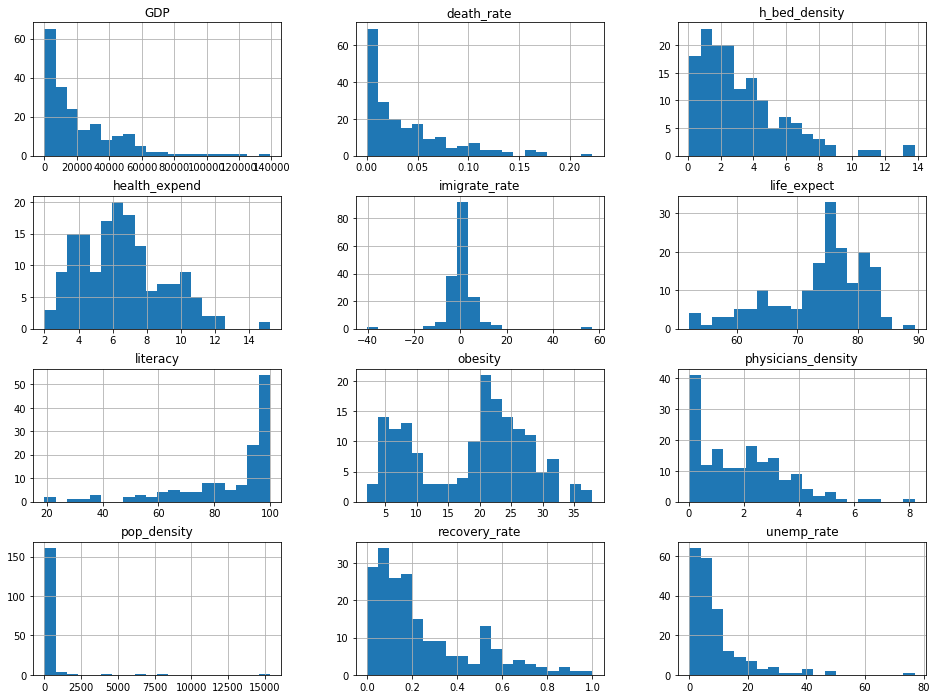

In [9]:
raw_dist = df_raw.hist(figsize=(16,12), bins=20)

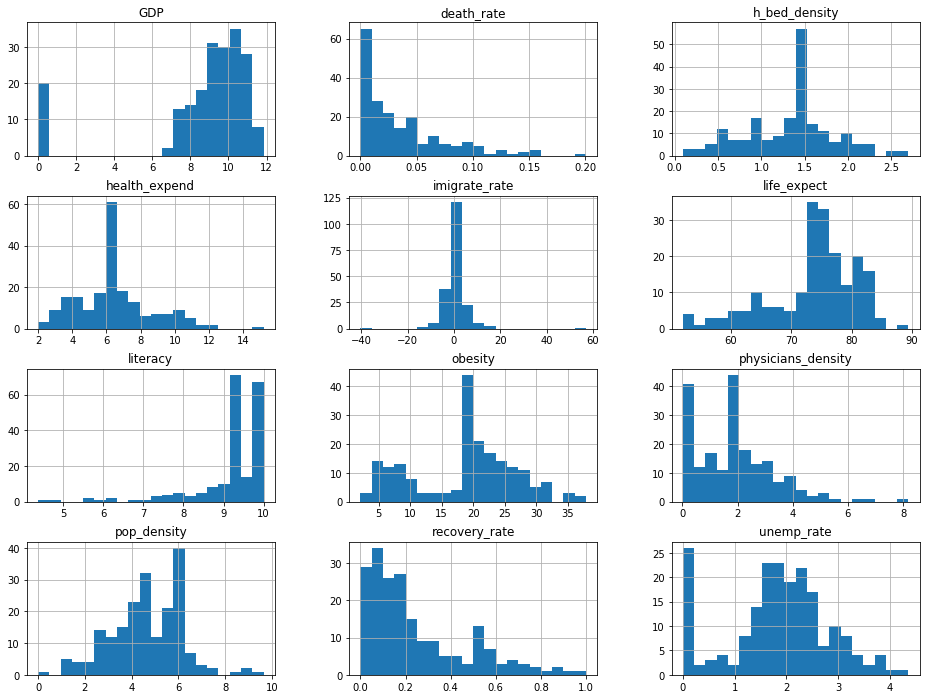

In [10]:
# log transform
preprocessed_dist = df_preprocessed.hist(figsize=(16,12), bins=20)

# 3. Correlation

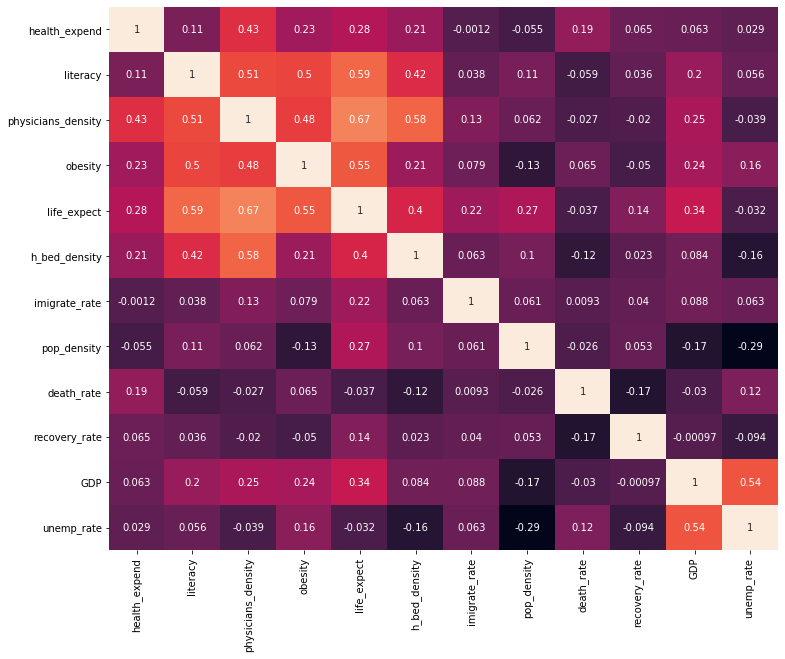

In [12]:
df_preprocessed = df_preprocessed.corr()
plt.subplots(figsize=(12,10))
sn.heatmap(df_preprocessed, annot=True, cbar=False, fmt='.2g')
plt.show()

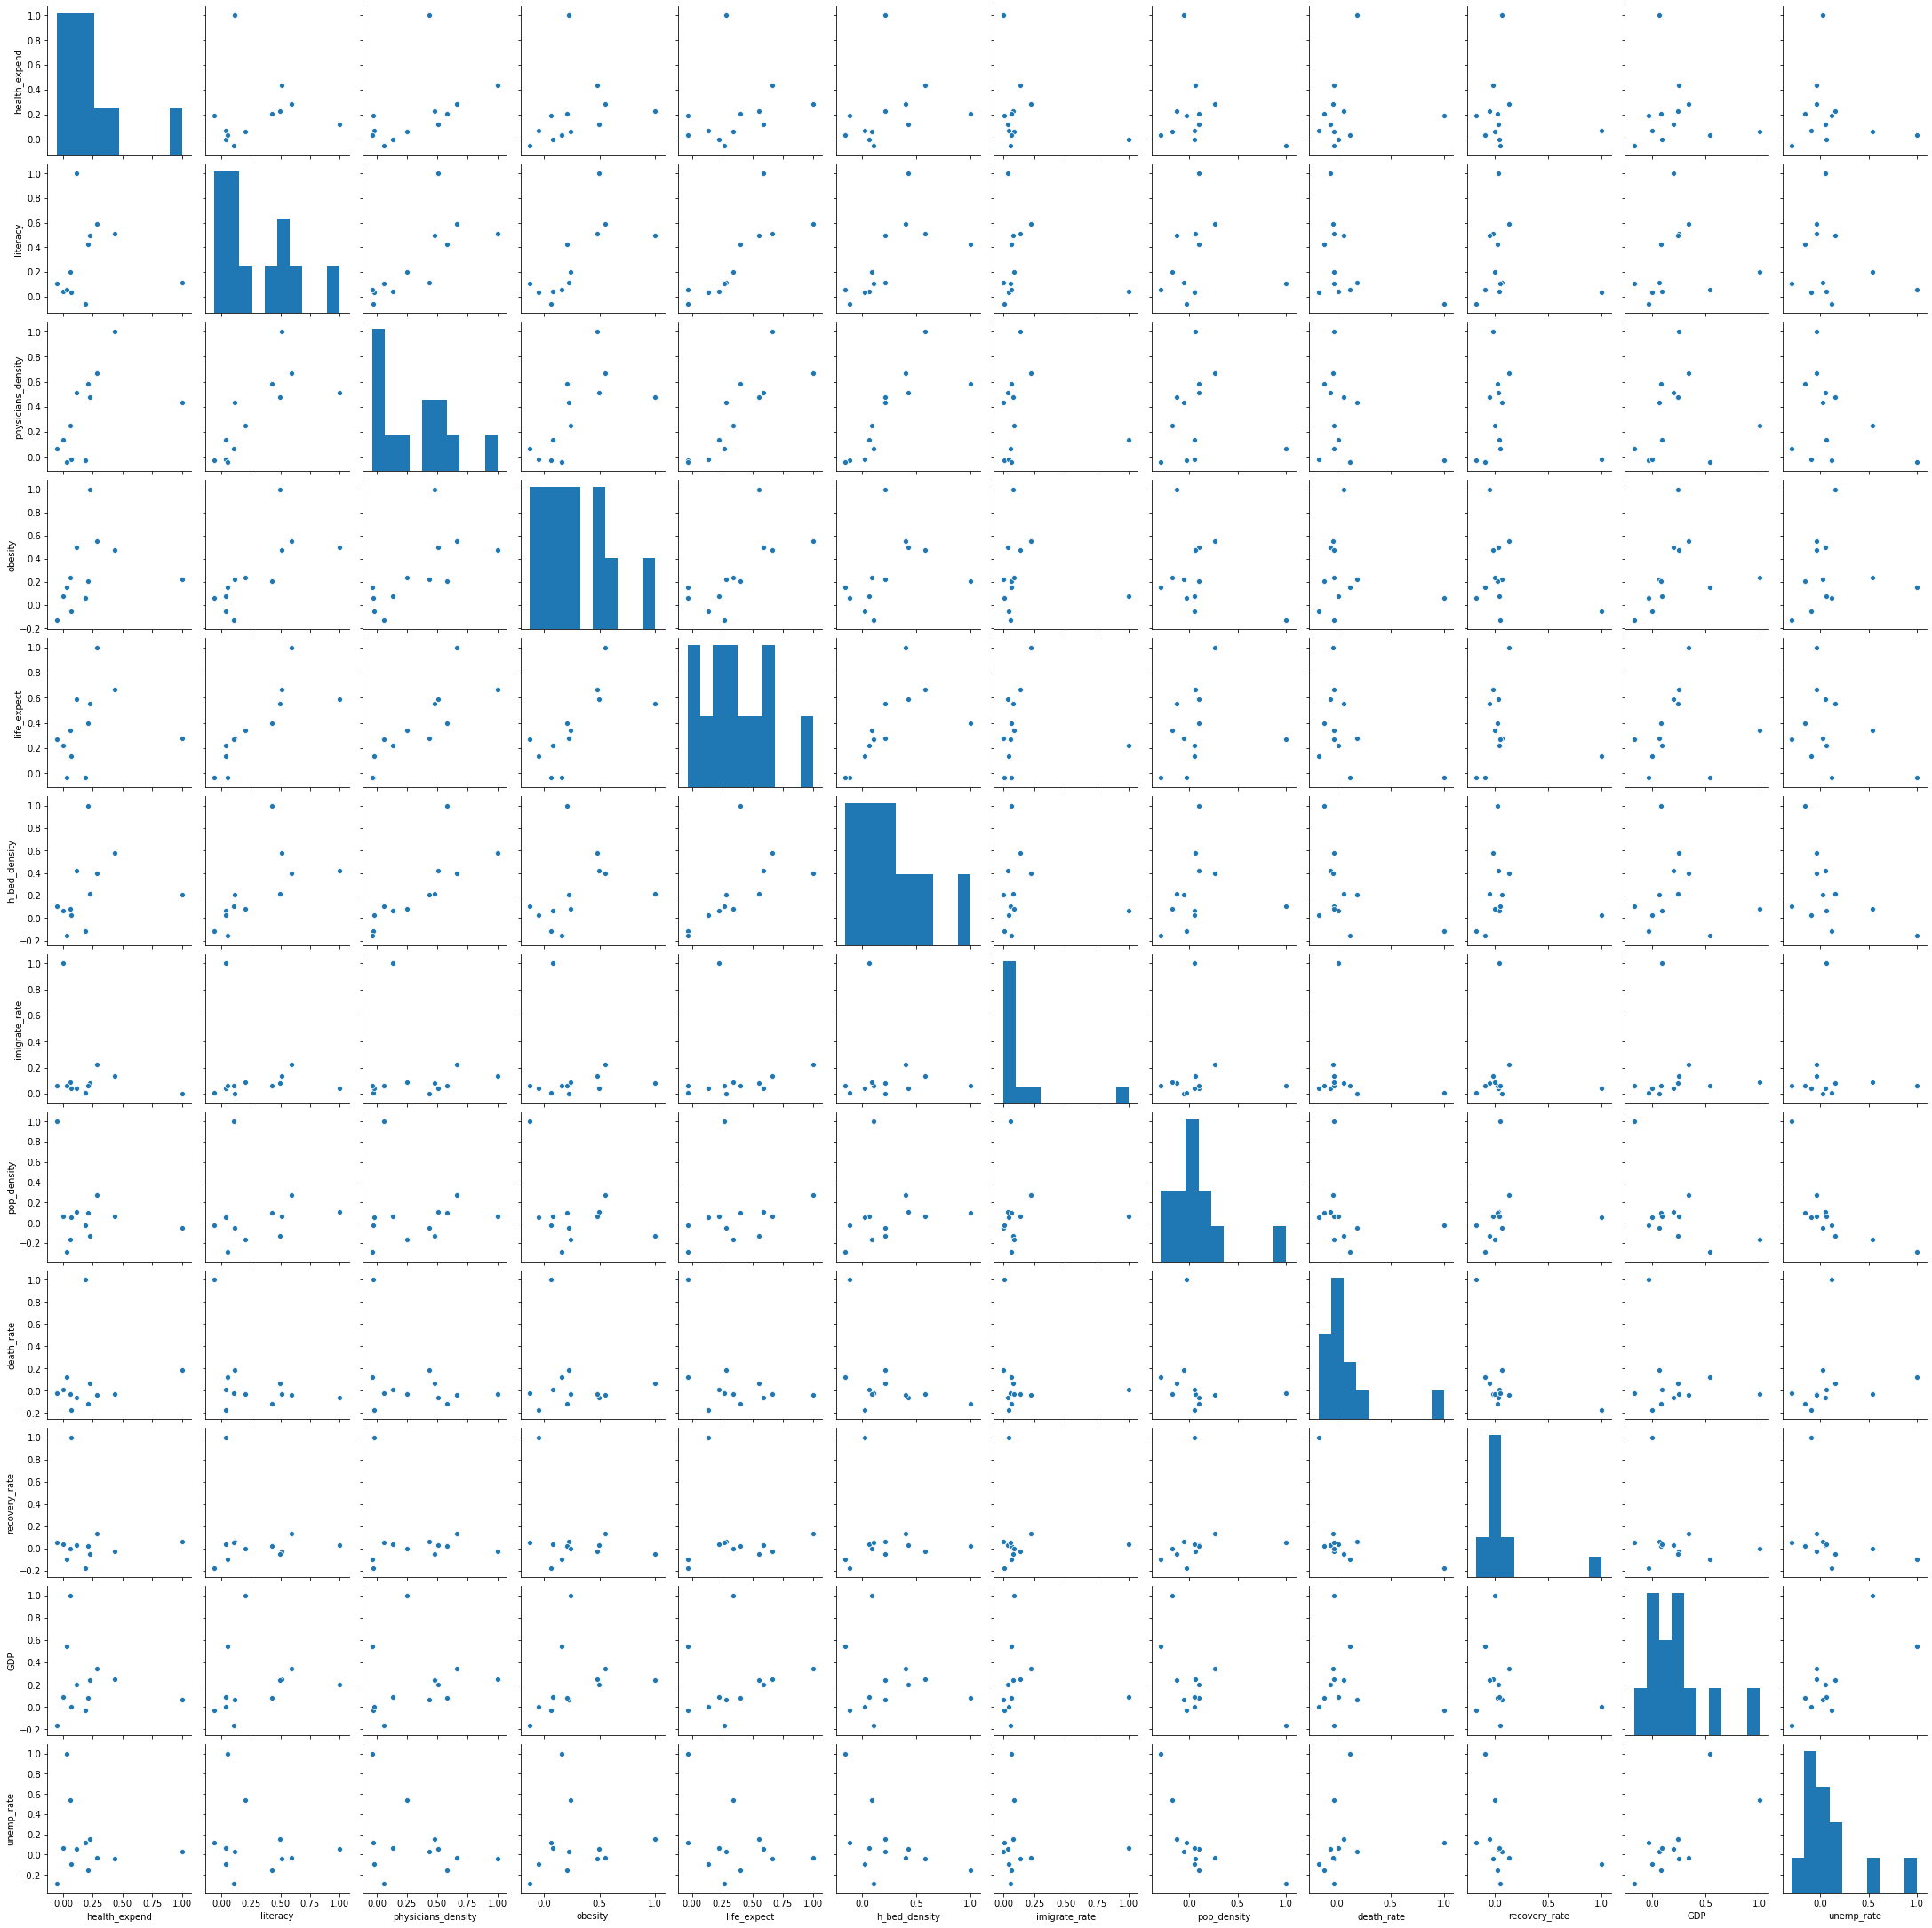

In [13]:
sn.pairplot(df_preprocessed)

In [14]:
df_preprocessed['physicians_density_cat'] = pd.qcut(df_preprocessed['physicians_density'],4, labels=["low","low_medium" ,"medium_high", "high"])


In [15]:
df_preprocessed['h_bed_density_cat'] = pd.qcut(df_preprocessed['h_bed_density'],4, labels=["low","low_medium" ,"medium_high", "high"])


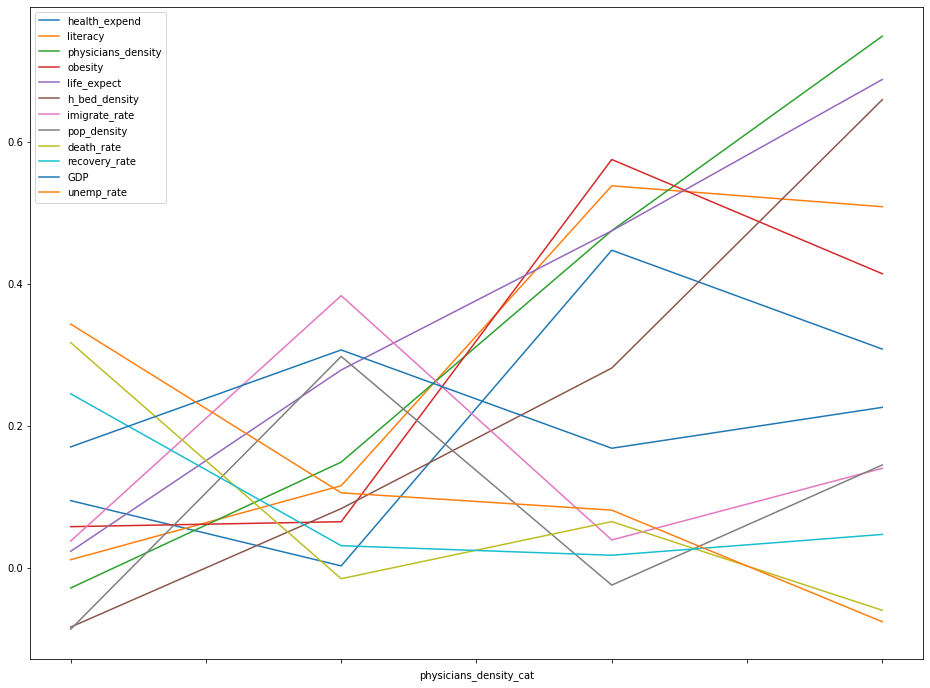

In [21]:
# relationship between Physicians Density and other predictors
df_preprocessed.groupby(['physicians_density_cat']).mean().plot.line(figsize=(16,12))


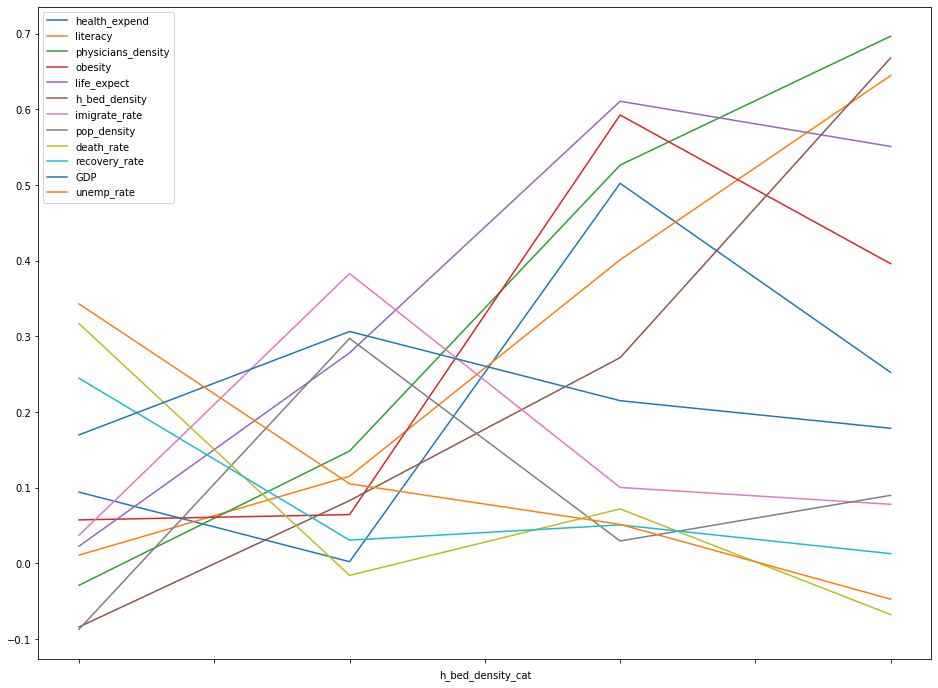

In [22]:
# relationship bwtween Hospital Bed Density and other predictors
df_preprocessed.groupby(['h_bed_density_cat']).mean().plot.line(figsize=(16,12))


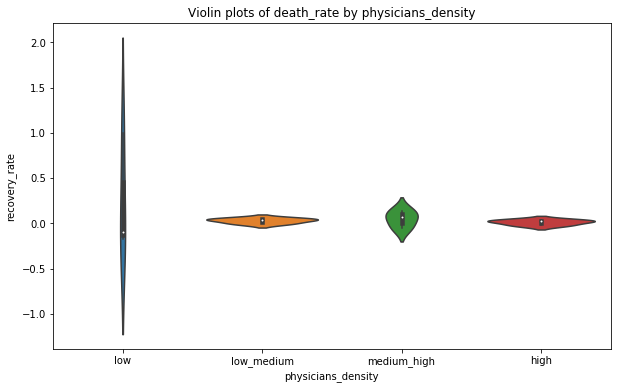

In [23]:
# relationship between Physicians Density and Recovery Rate
plt.figure(figsize=(10,6))
sn.violinplot(x='h_bed_density_cat', y='recovery_rate', data=df_preprocessed)
plt.title('Violin plots of death_rate by physicians_density')
plt.xlabel('physicians_density')
plt.ylabel('recovery_rate')
plt.show()